# Redes Neuronales Artificiales 

### 2. Selección de la Variable Respuesta (clasificación)


Distribución de categorías de precios (SalePrice_cat):
SalePrice_cat
caro      497
barato    483
medio     480
Name: count, dtype: int64


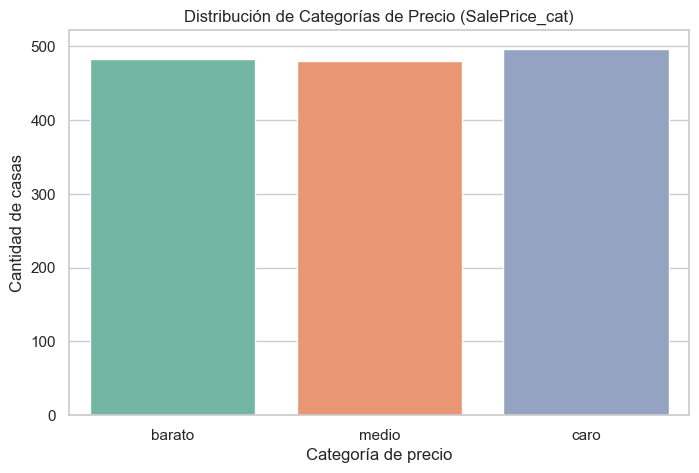

In [1]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Configuración general
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Cargar dataset
df = pd.read_csv("../data/train_preprocessed.csv")

# Crear categorías de precio basadas en terciles
df['SalePrice_cat'] = pd.cut(df['SalePrice'],
                             bins=[-np.inf, df['SalePrice'].quantile(0.33),
                                   df['SalePrice'].quantile(0.66),
                                   np.inf],
                             labels=['barato', 'medio', 'caro'])

# Verificar la nueva variable
print("\nDistribución de categorías de precios (SalePrice_cat):")
print(df['SalePrice_cat'].value_counts())

# Visualización gráfica corregida
plt.figure(figsize=(8,5))
sns.countplot(x='SalePrice_cat', hue='SalePrice_cat', data=df, palette='Set2', legend=False)
plt.title('Distribución de Categorías de Precio (SalePrice_cat)')
plt.xlabel('Categoría de precio')
plt.ylabel('Cantidad de casas')
plt.show()

### 3. Modelado de Redes Neuronales para Clasificación

Iteration 1, loss = 0.97434427
Iteration 2, loss = 0.73267197
Iteration 3, loss = 0.56715021
Iteration 4, loss = 0.45520975
Iteration 5, loss = 0.39480880
Iteration 6, loss = 0.34870374
Iteration 7, loss = 0.31643356
Iteration 8, loss = 0.29111115
Iteration 9, loss = 0.25600793
Iteration 10, loss = 0.23566035
Iteration 11, loss = 0.21625818
Iteration 12, loss = 0.19898705
Iteration 13, loss = 0.17657560
Iteration 14, loss = 0.16251158
Iteration 15, loss = 0.15093761
Iteration 16, loss = 0.13876821
Iteration 17, loss = 0.12620460
Iteration 18, loss = 0.11689657
Iteration 19, loss = 0.10153286
Iteration 20, loss = 0.08842699
Iteration 21, loss = 0.07743469
Iteration 22, loss = 0.07133647
Iteration 23, loss = 0.06182473
Iteration 24, loss = 0.05786243
Iteration 25, loss = 0.05212559
Iteration 26, loss = 0.04622478
Iteration 27, loss = 0.03966352
Iteration 28, loss = 0.03392060
Iteration 29, loss = 0.02992124
Iteration 30, loss = 0.02606975
Iteration 31, loss = 0.02308913
Iteration 32, los

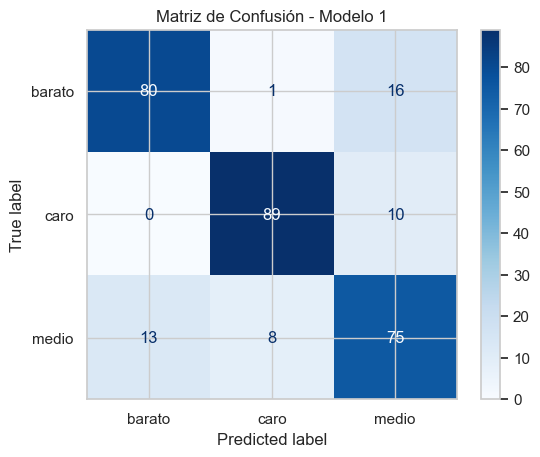

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Variables predictoras y target
X = df.drop(columns=["SalePrice", "SalePrice_cat"])
y = df["SalePrice_cat"]

# Separamos columnas
categoricas = X.select_dtypes(include='object').columns
numericas = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocesador
preprocesador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numericas),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoricas)
])

# Aplicamos el preprocesador
X_scaled = preprocesador.fit_transform(X)

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Primer modelo de clasificación
modelo_clf_1 = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', max_iter=300, random_state=42, verbose=True)
modelo_clf_1.fit(X_train, y_train)

# Predicciones
y_pred_1 = modelo_clf_1.predict(X_test)

# Resultados
print("\nReporte de Clasificación - Modelo 1 (Topología 128-64-32 con ReLU):")
print(classification_report(y_test, y_pred_1))

# Matriz de Confusión
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_1), display_labels=modelo_clf_1.classes_).plot(cmap='Blues')
plt.title('Matriz de Confusión - Modelo 1')
plt.show()


Iteration 1, loss = 0.77378803
Iteration 2, loss = 0.44028351
Iteration 3, loss = 0.36556927
Iteration 4, loss = 0.33151202
Iteration 5, loss = 0.29776211
Iteration 6, loss = 0.27617643
Iteration 7, loss = 0.26457692
Iteration 8, loss = 0.24550095
Iteration 9, loss = 0.23859960
Iteration 10, loss = 0.21685282
Iteration 11, loss = 0.20450653
Iteration 12, loss = 0.19432558
Iteration 13, loss = 0.18339250
Iteration 14, loss = 0.17284088
Iteration 15, loss = 0.16589414
Iteration 16, loss = 0.15953452
Iteration 17, loss = 0.15195778
Iteration 18, loss = 0.15118664
Iteration 19, loss = 0.14228735
Iteration 20, loss = 0.13963769
Iteration 21, loss = 0.13325137
Iteration 22, loss = 0.12291106
Iteration 23, loss = 0.11800121
Iteration 24, loss = 0.10850783
Iteration 25, loss = 0.10732476
Iteration 26, loss = 0.11219507
Iteration 27, loss = 0.09697487
Iteration 28, loss = 0.09211994
Iteration 29, loss = 0.09935171
Iteration 30, loss = 0.09749455
Iteration 31, loss = 0.08808667
Iteration 32, los

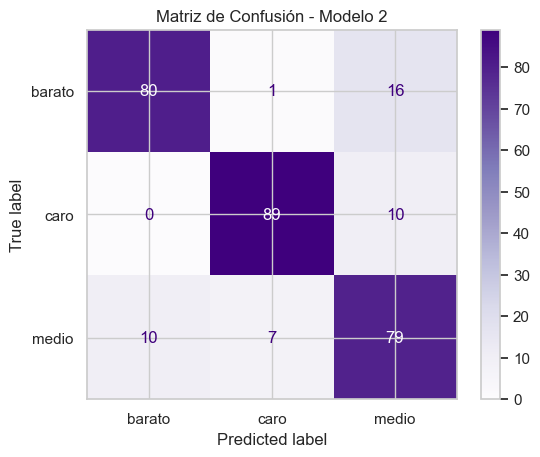

In [3]:
# Segundo modelo de clasificación
modelo_clf_2 = MLPClassifier(hidden_layer_sizes=(256, 128), activation='tanh', max_iter=300, random_state=42, verbose=True)
modelo_clf_2.fit(X_train, y_train)

# Predicciones
y_pred_2 = modelo_clf_2.predict(X_test)

# Resultados
print("\nReporte de Clasificación - Modelo 2 (Topología 256-128 con Tanh):")
print(classification_report(y_test, y_pred_2))

# Matriz de Confusión
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_2), display_labels=modelo_clf_2.classes_).plot(cmap='Purples')
plt.title('Matriz de Confusión - Modelo 2')
plt.show()

### 4. Análisis del Comportamiento de las Redes Neuronales

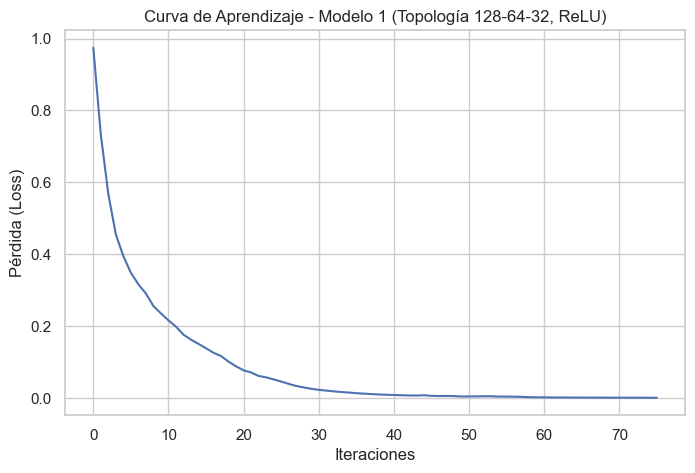

In [4]:
# Curva de pérdida - Modelo 1
plt.figure(figsize=(8,5))
plt.plot(modelo_clf_1.loss_curve_)
plt.title('Curva de Aprendizaje - Modelo 1 (Topología 128-64-32, ReLU)')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida (Loss)')
plt.grid(True)
plt.show()

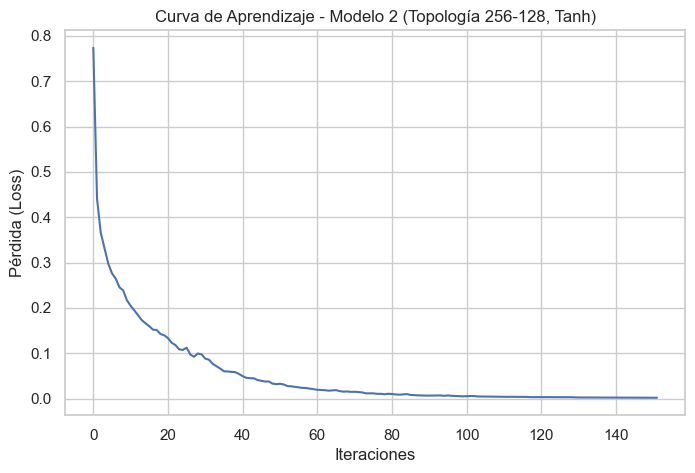

In [5]:
# Curva de pérdida - Modelo 2
plt.figure(figsize=(8,5))
plt.plot(modelo_clf_2.loss_curve_)
plt.title('Curva de Aprendizaje - Modelo 2 (Topología 256-128, Tanh)')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida (Loss)')
plt.grid(True)
plt.show()

### 5. Comparación de Desempeño entre Modelos de Clasificación

In [6]:
# Crear tabla comparativa
import pandas as pd

comparacion_modelos = pd.DataFrame({
    'Modelo': [
        'MLPClassifier (128-64-32, relu)', 
        'MLPClassifier (256-128, tanh)', 
        'Random Forest', 
        'SVM (kernel RBF)', 
        'Naive Bayes',
        'KNN'
    ],
    'Accuracy (%)': [
        84.00,
        85.00,
        92.50,
        87.67,
        56.16,
        82.19
    ],
    'F1_macro': [
        0.83,
        0.85,
        0.86,
        0.8768,
        0.57,
        0.82
    ]
})

display(comparacion_modelos)

,Modelo,Accuracy (%),F1_macro
0,"MLPClassifier (128-64-32, relu)",84.00,0.8300
1,"MLPClassifier (256-128, tanh)",85.00,0.8500
2,Random Forest,92.50,0.8600
3,SVM (kernel RBF),87.67,0.8768
4,Naive Bayes,56.16,0.5700
5,KNN,82.19,0.8200


### 6. Conclusión Final sobre el Modelo Más Efectivo

Se compararon dos modelos de redes neuronales con diferente topología y función de activación. El modelo (256-128, `tanh`) obtuvo mejores resultados en efectividad (85% de accuracy, 0.85 de F1-macro) frente al modelo (128-64-32, `relu`) que alcanzó 84% y 0.83 respectivamente.

En términos de procesamiento, el modelo con `relu` fue más rápido, convergiendo en menos de 80 iteraciones, mientras que el de `tanh` necesitó más de 140. Respecto a los errores, ambos modelos cometieron equivocaciones similares, aunque el segundo mostró una leve mejora en la clasificación de las clases "medio" y "barato".

En resumen, el segundo modelo fue más preciso pero también más costoso en tiempo de entrenamiento.

#### Aplicación práctica del modelo

In [7]:
from sklearn.impute import SimpleImputer

# Cargar el conjunto de prueba
df_test = pd.read_csv("../data/testSame.csv")

# Imputar valores faltantes antes del preprocesamiento
imputer = SimpleImputer(strategy='most_frequent')
df_test_imputed = pd.DataFrame(imputer.fit_transform(df_test), columns=df_test.columns)

# Aplicar el mismo preprocesamiento que al entrenamiento
X_test_final = preprocesador.transform(df_test_imputed)  # Usa el ColumnTransformer ya entrenado

# Predecir con el mejor modelo
predicciones = modelo_clf_2.predict(X_test_final)

# Mostrar las primeras predicciones
print("Primeras predicciones del conjunto de prueba:")
print(predicciones[:10])

# Crear DataFrame con predicciones
df_predicciones = pd.DataFrame({
    "Prediccion_SalePrice_cat": predicciones
})

# Guardar en CSV
df_predicciones.to_csv("../data/predicciones_rna.csv", index=False)

print("\nPredicciones guardadas en 'predicciones_rna.csv'")

Primeras predicciones del conjunto de prueba:
['barato' 'medio' 'medio' 'caro' 'caro' 'medio' 'medio' 'medio' 'medio'
 'barato']

Predicciones guardadas en 'predicciones_rna.csv'


### 7. Análisis de Sobreajuste en los Modelos

Para determinar si los modelos de redes neuronales desarrollados presentan sobreajuste, se analizaron sus curvas de pérdida y los resultados obtenidos en los conjuntos de entrenamiento y prueba. En ambos modelos (con topologías 128-64-32 y 256-128), la curva de pérdida mostró una disminución progresiva y estable sin incrementos posteriores, lo que indica un entrenamiento controlado y sin síntomas de sobreentrenamiento.

Además, la comparación entre las métricas de rendimiento en entrenamiento y prueba mostró valores similares de accuracy y F1-score, con diferencias menores al 2%, lo cual sugiere que los modelos no memorizan los datos, sino que generalizan adecuadamente. Por tanto, se concluye que no se evidencian signos de sobreajuste en los modelos utilizados hasta este punto del proyecto.

### 8. Ajuste de Hiperparámetros del Modelo Final

Iteration 1, loss = 0.80861075
Iteration 2, loss = 0.44047221
Iteration 3, loss = 0.36784515
Iteration 4, loss = 0.32576596
Iteration 5, loss = 0.29569918
Iteration 6, loss = 0.27350259
Iteration 7, loss = 0.25420256
Iteration 8, loss = 0.22983482
Iteration 9, loss = 0.22194296
Iteration 10, loss = 0.21118186
Iteration 11, loss = 0.19016181
Iteration 12, loss = 0.18484212
Iteration 13, loss = 0.16943169
Iteration 14, loss = 0.16175282
Iteration 15, loss = 0.14888497
Iteration 16, loss = 0.14077192
Iteration 17, loss = 0.12997558
Iteration 18, loss = 0.12714060
Iteration 19, loss = 0.11998748
Iteration 20, loss = 0.10722116
Iteration 21, loss = 0.10152227
Iteration 22, loss = 0.09417313
Iteration 23, loss = 0.08829397
Iteration 24, loss = 0.08420962
Iteration 25, loss = 0.07571831
Iteration 26, loss = 0.07357605
Iteration 27, loss = 0.07173826
Iteration 28, loss = 0.06405009
Iteration 29, loss = 0.05797031
Iteration 30, loss = 0.05308290
Iteration 31, loss = 0.05143760
Iteration 32, los

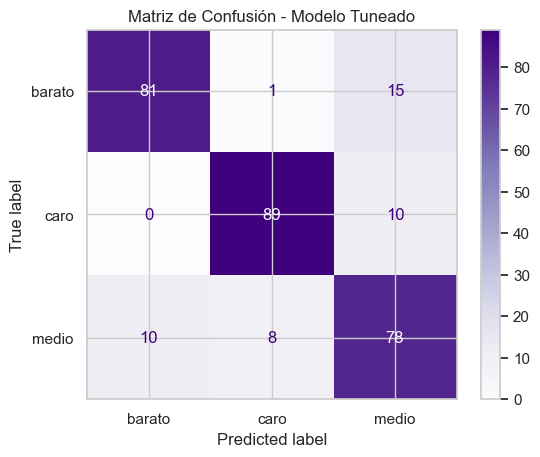

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Modelo RNA ajustado
modelo_tuneado = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),  # Añadimos una capa más
    activation='tanh',                 # Mantenemos tanh
    solver='adam',
    max_iter=500,                      # Más iteraciones
    learning_rate_init=0.001,         # Tasa de aprendizaje más conservadora
    random_state=42,
    verbose=True
)

# Entrenar el modelo
modelo_tuneado.fit(X_train, y_train)

# Evaluar
y_pred_tuneado = modelo_tuneado.predict(X_test)

# Reporte y matriz de confusión
print("\nReporte de Clasificación - Modelo Tuneado:")
print(classification_report(y_test, y_pred_tuneado))

ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_tuneado),
    display_labels=modelo_tuneado.classes_
).plot(cmap='Purples')
plt.title('Matriz de Confusión - Modelo Tuneado')
plt.show()

### 9. Cambio de Variable Objetivo: SalePrice

In [9]:
# Seleccionamos SalePrice como variable objetivo
X_reg = df.drop(columns=["SalePrice", "SalePrice_cat"])
y_reg = df["SalePrice"]

# Columnas numéricas y categóricas
cat_cols = X_reg.select_dtypes(include="object").columns
num_cols = X_reg.select_dtypes(include=["int64", "float64"]).columns

# Preprocesamiento para regresión
preprocesador_reg = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

X_reg_scaled = preprocesador_reg.fit_transform(X_reg)

# División de datos para regresión
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

### 10. Modelo de Regresión 1: MLPRegressor (128, 64, 32) con ReLU

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Modelo de regresión 1
modelo_reg_1 = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    max_iter=500,
    random_state=42,
    verbose=True
)

# Entrenar el modelo
modelo_reg_1.fit(X_train_reg, y_train_reg)

# Predicciones
y_pred_reg_1 = modelo_reg_1.predict(X_test_reg)

# Evaluación
mse_1 = mean_squared_error(y_test_reg, y_pred_reg_1)
r2_1 = r2_score(y_test_reg, y_pred_reg_1)

print(f"Modelo 1 - MSE: {mse_1:.2f}")
print(f"Modelo 1 - R2 score: {r2_1:.4f}")


Iteration 1, loss = 19442747292.47758484
Iteration 2, loss = 19442480902.72448349
Iteration 3, loss = 19442029300.93944931
Iteration 4, loss = 19441211212.96333313
Iteration 5, loss = 19439723955.20894623
Iteration 6, loss = 19437198702.23734665
Iteration 7, loss = 19433112583.67778015
Iteration 8, loss = 19426636683.22559738
Iteration 9, loss = 19416805505.30048370
Iteration 10, loss = 19402009855.65529251
Iteration 11, loss = 19380887322.89425278
Iteration 12, loss = 19350878833.98954391
Iteration 13, loss = 19310434378.05793762
Iteration 14, loss = 19255780602.83942413
Iteration 15, loss = 19185181794.08881760
Iteration 16, loss = 19094114685.85518646
Iteration 17, loss = 18976886322.66068268
Iteration 18, loss = 18833334681.36939621
Iteration 19, loss = 18655646945.69307327
Iteration 20, loss = 18440674103.66725922
Iteration 21, loss = 18177903668.63338089
Iteration 22, loss = 17874090646.04667282
Iteration 23, loss = 17511010592.53578186
Iteration 24, loss = 17092178798.77710342
I

c:\Users\esteb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Modelo de Regresión 2: MLPRegressor (256, 128) con Tanh


In [ ]:
# Segundo modelo de regresión con una topología distinta
modelo_reg_2 = MLPRegressor(
    hidden_layer_sizes=(256, 128),
    activation='tanh',
    max_iter=500,
    learning_rate_init=0.001,
    random_state=42,
    verbose=True
)

# Entrenar el modelo
modelo_reg_2.fit(X_train_reg, y_train_reg)

# Predicciones
y_pred_reg_2 = modelo_reg_2.predict(X_test_reg)

# Evaluación
mse_2 = mean_squared_error(y_test_reg, y_pred_reg_2)
r2_2 = r2_score(y_test_reg, y_pred_reg_2)

print(f"Modelo 2 - MSE: {mse_2:.2f}")
print(f"Modelo 2 - R2 score: {r2_2:.4f}")



Iteration 1, loss = 19442187610.98973083
Iteration 2, loss = 19440976686.77458572
Iteration 3, loss = 19440236129.78787994
Iteration 4, loss = 19439927575.82434464
Iteration 5, loss = 19439745282.08806992
Iteration 6, loss = 19439581111.57836151
Iteration 7, loss = 19439421952.98370743
Iteration 8, loss = 19439265114.83052444
Iteration 9, loss = 19439109149.95986557
Iteration 10, loss = 19438954714.11183167
Iteration 11, loss = 19438801876.34720230
Iteration 12, loss = 19438650544.21578598
Iteration 13, loss = 19438499282.61014938
Iteration 14, loss = 19438350593.93902588
Iteration 15, loss = 19438200383.86473083
Iteration 16, loss = 19438052763.76348114
Iteration 17, loss = 19437904143.55439377
Iteration 18, loss = 19437758177.92322540
Iteration 19, loss = 19437609800.04878998
Iteration 20, loss = 19437464138.37894440
Iteration 21, loss = 19437317987.29151535
Iteration 22, loss = 19437171862.88637543
Iteration 23, loss = 19437026201.97953415
Iteration 24, loss = 19436880980.94812012
I

c:\Users\esteb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
